In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data = pd.read_csv("ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
# One-Hot Encoding for Fuel_Type
data_encoded = pd.get_dummies(data, dtype = "int",  columns=['Fuel_Type'], drop_first=True)

In [5]:
data_encoded.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0


In [6]:
data_encoded[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']] = data_encoded[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']].astype(int)


In [7]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   int64
 11  Fuel_Type_Petrol  1436 non-null   int64
dtypes: int64(12)
memory usage: 134.8 KB


In [8]:
#check for missing values
data.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


<Axes: >

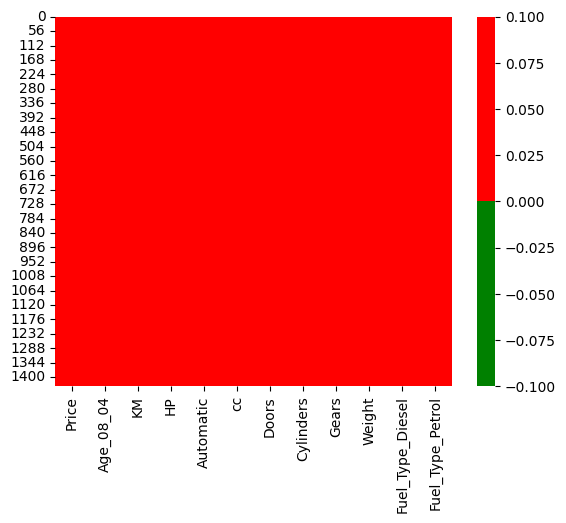

In [9]:
cols = data_encoded.columns
colours = ['green', 'red']#specify the colours - red is missing. green is not missing.
sns.heatmap(data_encoded[cols].isnull(),
            cmap=colours)

**correlation matrix**

In [10]:
data_encoded.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


In [11]:
data_encoded["Cylinders"].unique()

array([4])

In [12]:
data_encoded["Cylinders"].isnull().sum()

0

In [13]:
data_encoded.drop(columns=['Cylinders'], inplace=True) #dropping cylinder

In [14]:
correlation_matrix = data_encoded.corr()
correlation_matrix

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.568087,-0.560470
Fuel_Type_Diesel,0.054084,-0.097740,0.403060,-0.533453,-0.084490,0.327723,0.025495,-0.048847,0.568087,1.000000,-0.942976


In [15]:
data_encoded.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.568087,-0.560470
Fuel_Type_Diesel,0.054084,-0.097740,0.403060,-0.533453,-0.084490,0.327723,0.025495,-0.048847,0.568087,1.000000,-0.942976


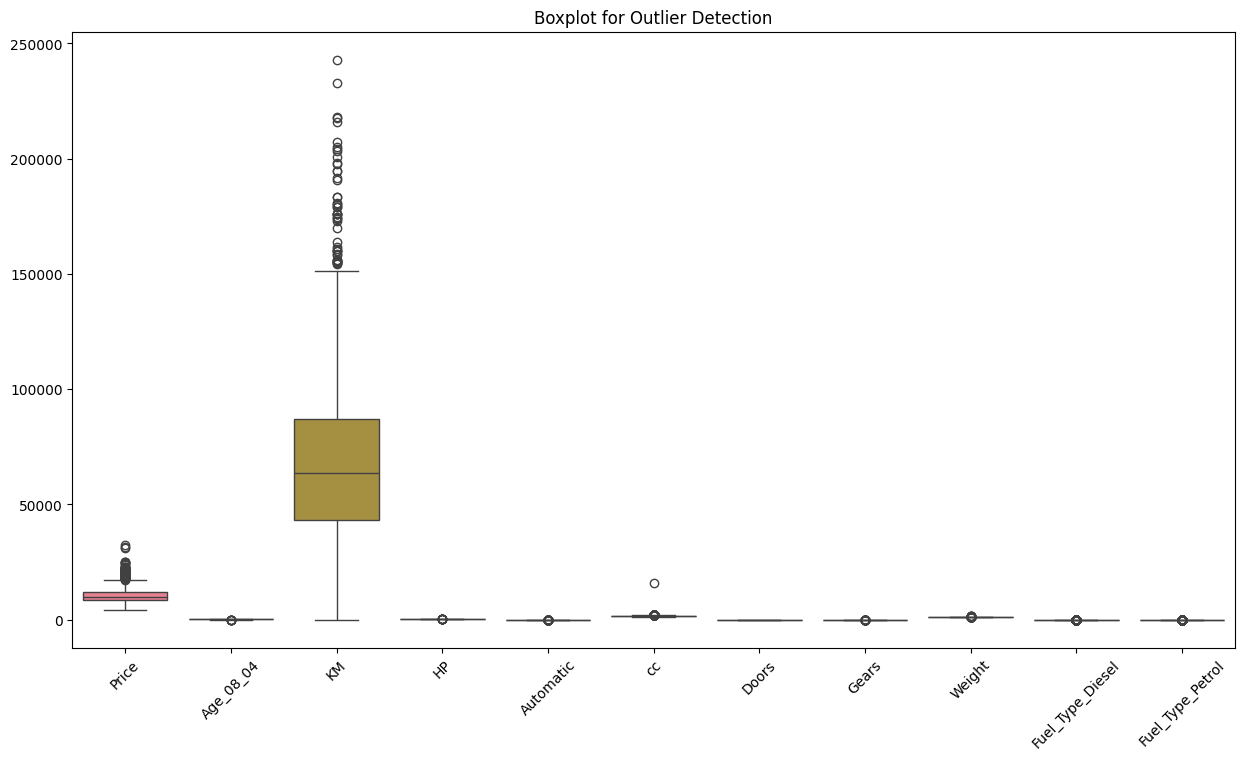

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(data_encoded)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

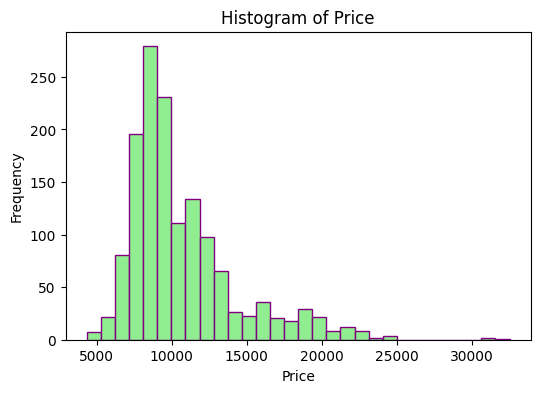

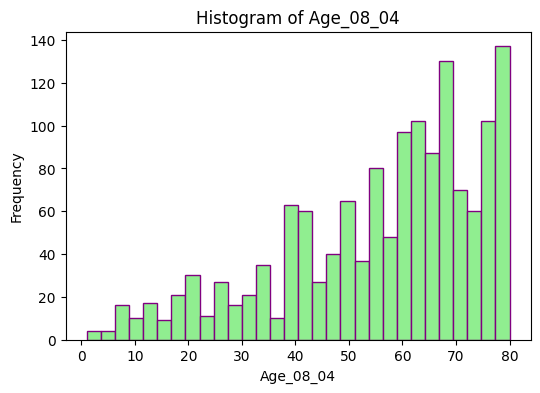

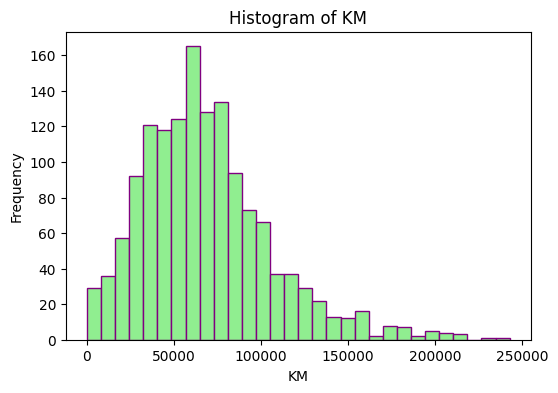

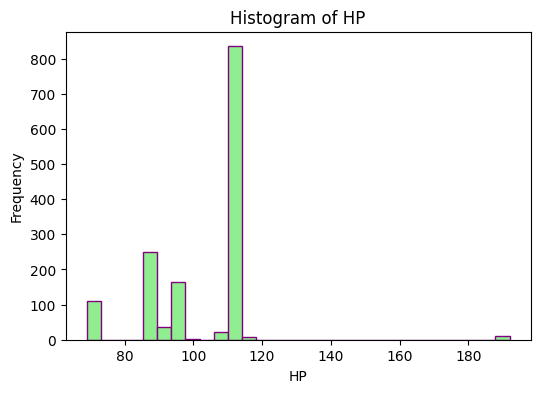

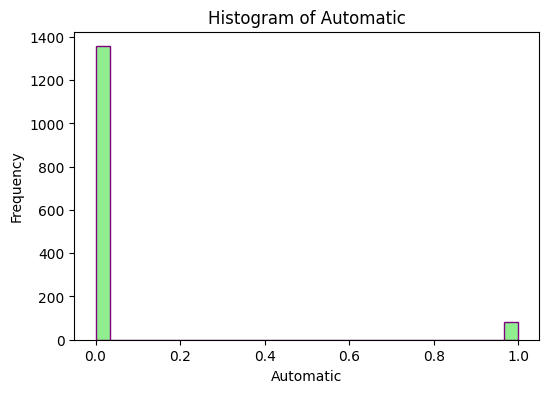

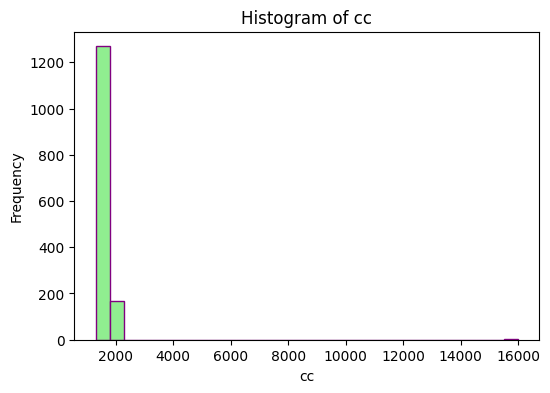

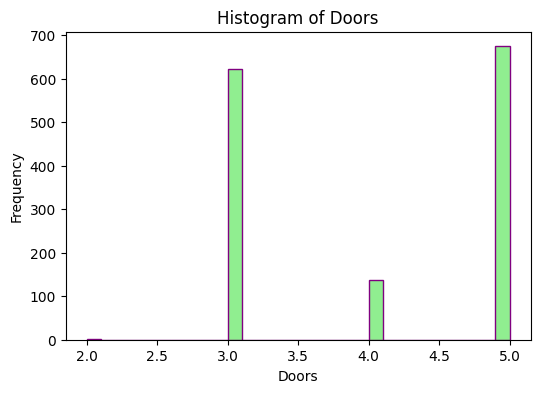

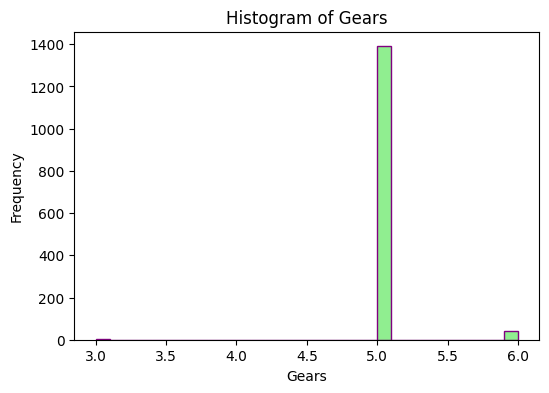

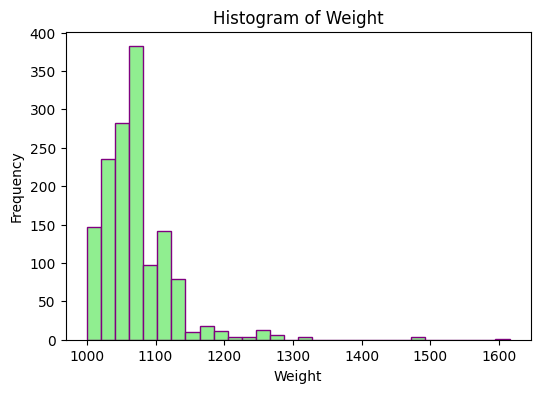

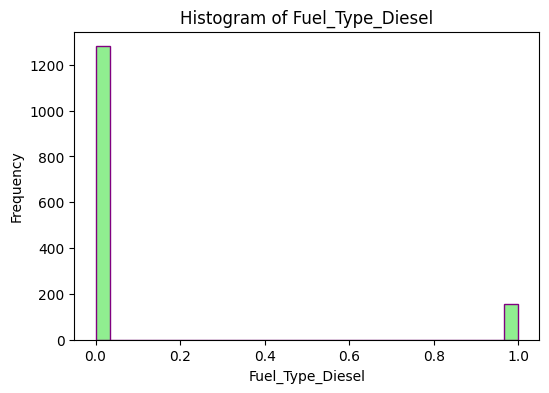

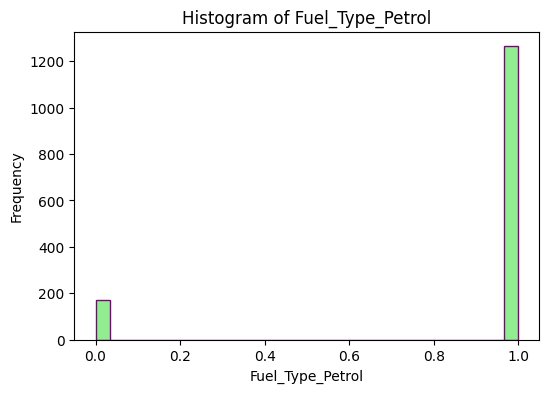

In [17]:
# Identify numerical columns
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Ploting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data_encoded[col], bins=30, color='lightgreen', edgecolor='purple')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

# outliers removing

[4350.0, 17200.0]

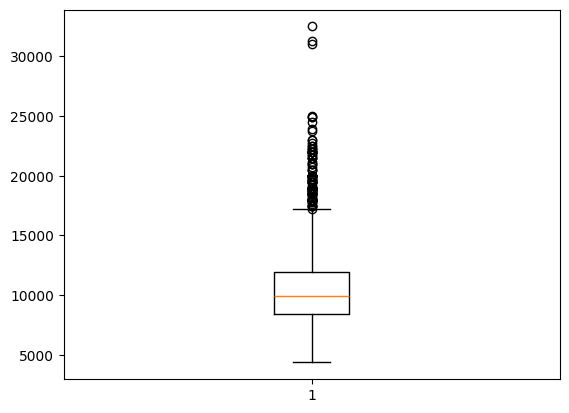

In [18]:
box_Price=plt.boxplot(data_encoded['Price'])
[item.get_ydata()[1] for item in box_Price['whiskers']]

In [19]:
data_encoded.loc[data_encoded.Price>17200.0,"Price"]=17200.0 #upper extreme
data_encoded.loc[data_encoded.Price<4350.0,"Price"]=4350.0#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24f7a8e10>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24f7abcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24f7a9f50>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24f802c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24f54e3d0>],
 'means': []}

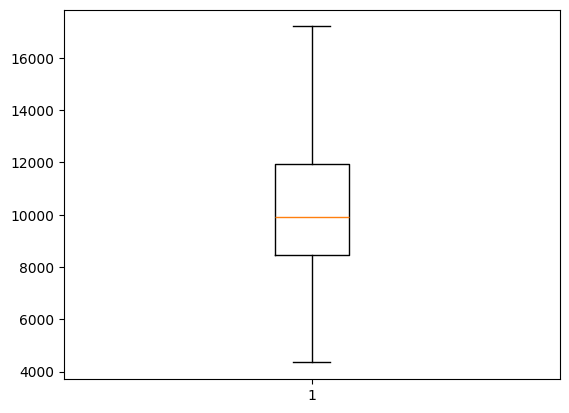

In [20]:
plt.boxplot(data_encoded['Price'])

[6.0, 80.0]

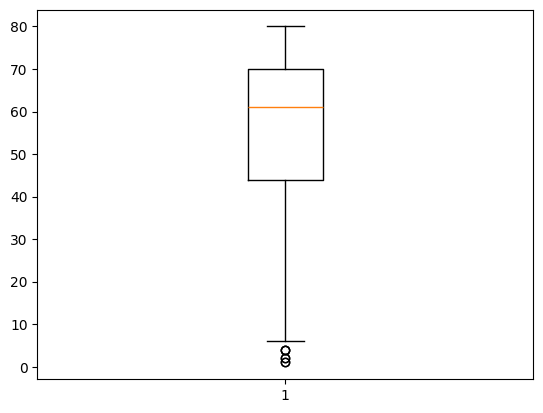

In [21]:
box_Age_08_04=plt.boxplot(data_encoded['Age_08_04'])
[item.get_ydata()[1] for item in box_Age_08_04['whiskers']]

In [22]:
data_encoded.loc[data_encoded.Age_08_04<6.0,"Age_08_04"]=6.0#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24f90b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24f8e8310>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24f909610>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24f8ea4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24f8eb410>],
 'means': []}

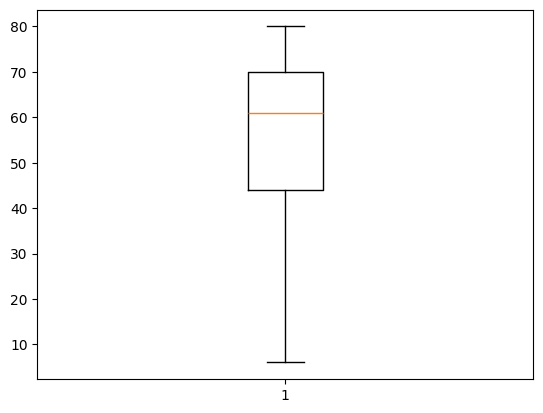

In [23]:
plt.boxplot(data_encoded['Age_08_04'])

[1.0, 151300.0]

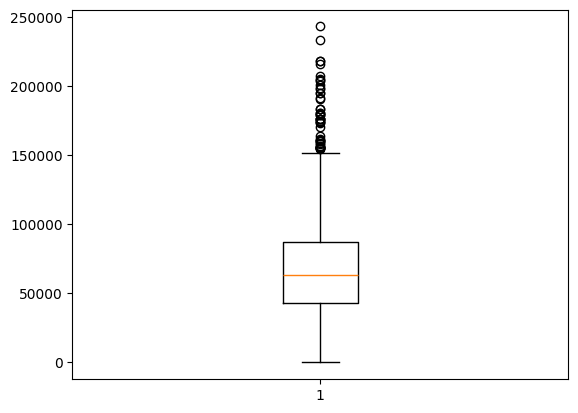

In [24]:
box_KM=plt.boxplot(data_encoded['KM'])
[item.get_ydata()[1] for item in box_KM['whiskers']]

In [25]:
data_encoded.loc[data_encoded.KM>151300.0,"KM"]=151300.0#upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24f41d910>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24f42de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24f8c2a90>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24f42c090>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24f42ca50>],
 'means': []}

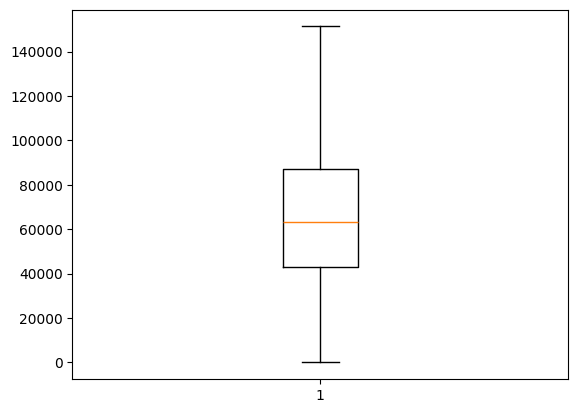

In [26]:
plt.boxplot(data_encoded['KM'])

[69.0, 116.0]

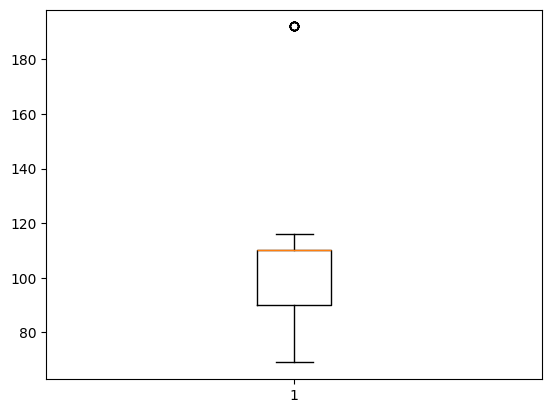

In [27]:
box_HP=plt.boxplot(data_encoded['HP'])
[item.get_ydata()[1] for item in box_HP['whiskers']]

In [28]:
data_encoded.loc[data_encoded.HP>116.0,"HP"]=116.0#upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24f5f5a10>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24f5f7290>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24f5f4f90>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24f5506d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24f5fcb50>],
 'means': []}

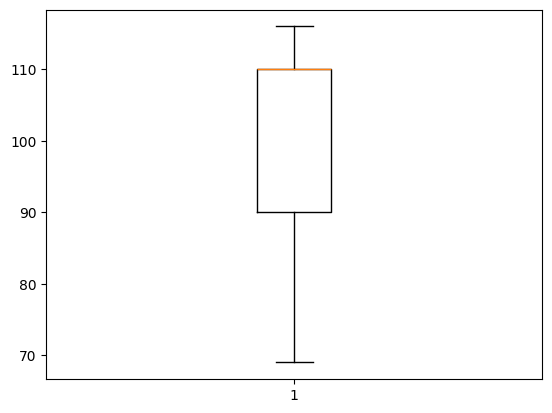

In [29]:
plt.boxplot(data_encoded['HP'])

[0.0, 0.0]

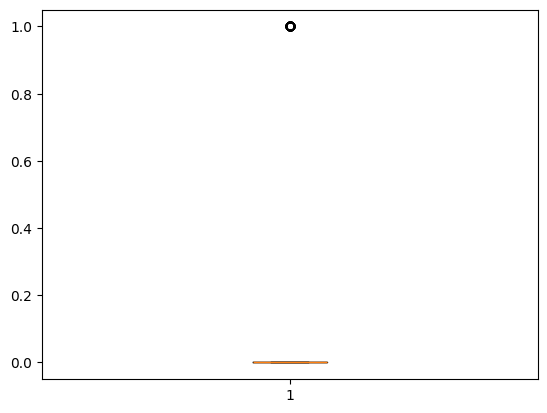

In [30]:
box_Automatic=plt.boxplot(data_encoded['Automatic'])
[item.get_ydata()[1] for item in box_Automatic['whiskers']]

In [31]:
data_encoded.loc[data_encoded.Automatic>0,"Automatic"]=0 #upper extreme
data_encoded.loc[data_encoded.Automatic<0,"Automatic"]=0#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24ef6e0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24ef6f7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24ef6d5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24ef790d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24ef79c10>],
 'means': []}

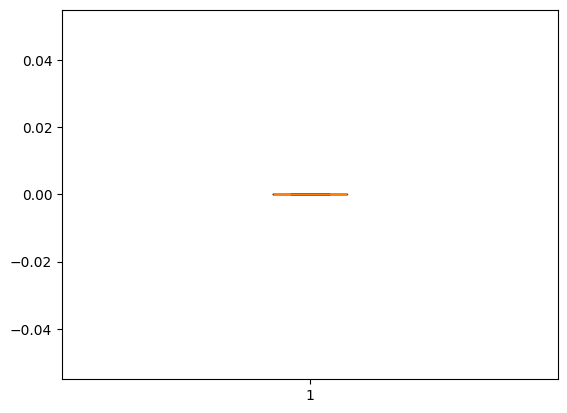

In [32]:
plt.boxplot(data_encoded['Automatic'])

[1300.0, 1900.0]

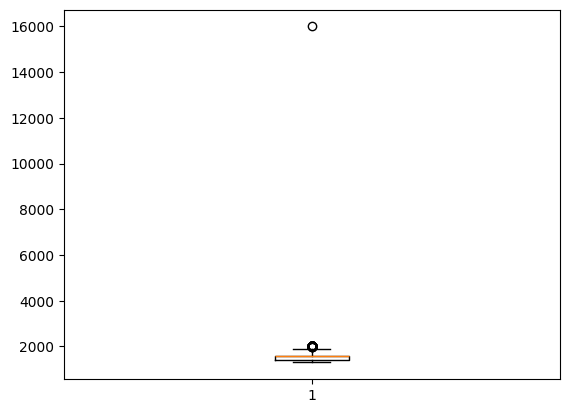

In [33]:
box_cc=plt.boxplot(data_encoded['cc'])
[item.get_ydata()[1] for item in box_cc['whiskers']]

In [34]:
data_encoded.loc[data_encoded.cc>1900.0,"cc"]=1900.0#upper extreme
data_encoded.loc[data_encoded.cc<1300.0,"cc"]=1300.0,#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24ee2ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24ee38510>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24ee2e250>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24ee39cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24ee3a7d0>],
 'means': []}

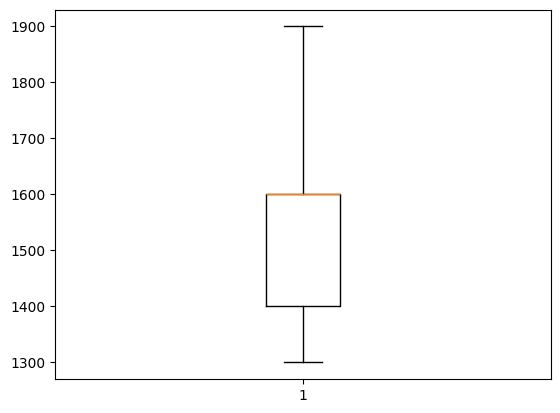

In [35]:
plt.boxplot(data_encoded['cc'])

[5.0, 5.0]

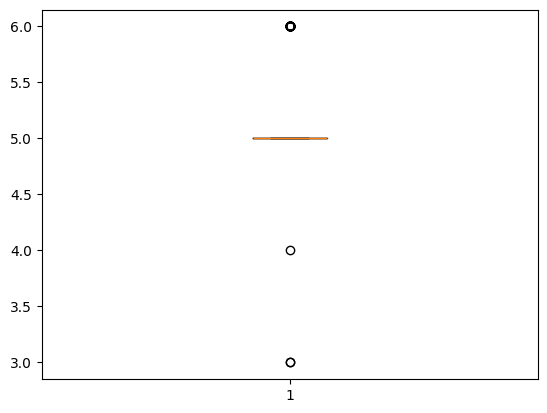

In [36]:
box_Gears=plt.boxplot(data_encoded['Gears'])
[item.get_ydata()[1] for item in box_Gears['whiskers']]

In [37]:
data_encoded.loc[data_encoded.Gears>5.0,"Gears"]=5.0 #upper extreme
data_encoded.loc[data_encoded.Gears<5.0,"Gears"]=5.0#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24eef5450>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24eef6a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24eef47d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24ef00350>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24ef00e90>],
 'means': []}

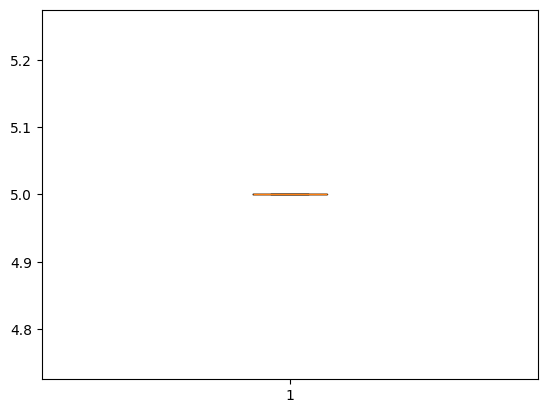

In [38]:
plt.boxplot(data_encoded['Gears'])

[1000.0, 1150.0]

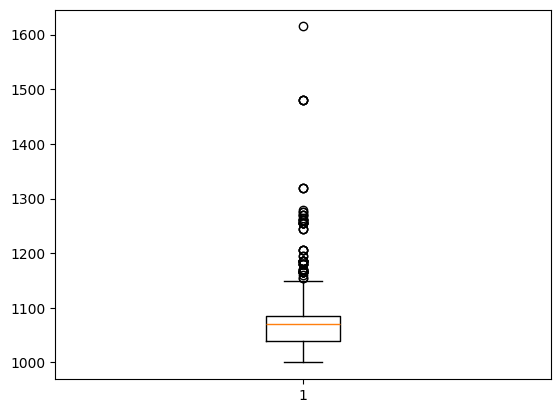

In [39]:
box_Weight=plt.boxplot(data_encoded['Weight'])
[item.get_ydata()[1] for item in box_Weight['whiskers']]

In [40]:
data_encoded.loc[data_encoded.Weight>1150.0,"Weight"]=1150.0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24edbc210>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24edab050>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24edb7590>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24edbec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24edbf710>],
 'means': []}

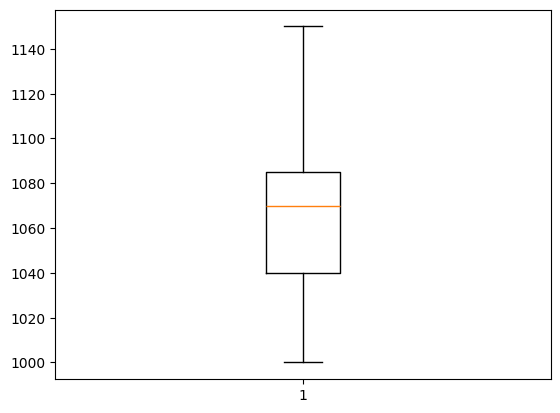

In [41]:
plt.boxplot(data_encoded['Weight'])

[0.0, 0.0]

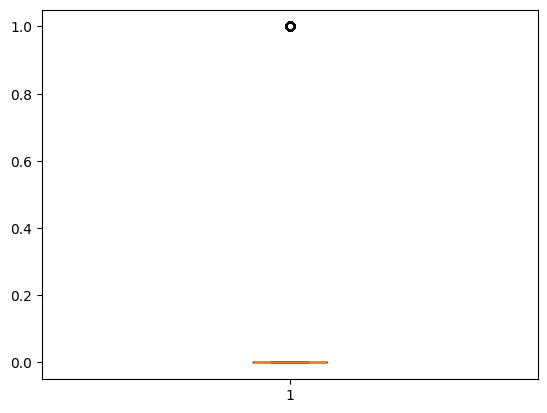

In [42]:
box_Fuel_Type_Diesel=plt.boxplot(data_encoded['Fuel_Type_Diesel'])
[item.get_ydata()[1] for item in box_Fuel_Type_Diesel['whiskers']]

In [43]:
data_encoded.loc[data_encoded.Fuel_Type_Diesel>0,"Fuel_Type_Diesel"]=0 #upper extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24ec86490>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24ec87b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24ec85ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24ec95350>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24ec95e10>],
 'means': []}

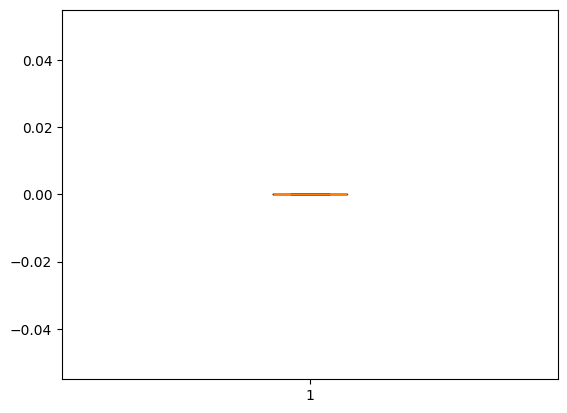

In [44]:
plt.boxplot(data_encoded['Fuel_Type_Diesel'])

[1.0, 1.0]

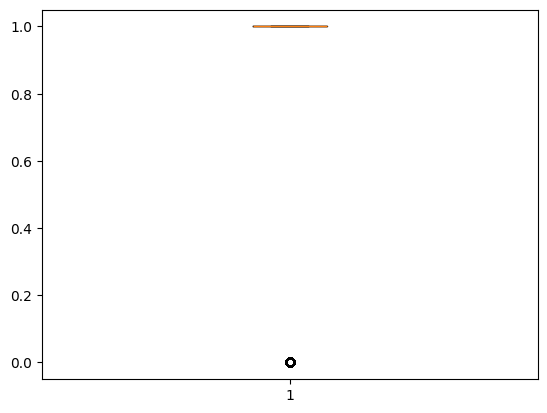

In [45]:
box_Fuel_Type_Petrol=plt.boxplot(data_encoded['Fuel_Type_Petrol'])
[item.get_ydata()[1] for item in box_Fuel_Type_Petrol['whiskers']]

In [46]:
data_encoded.loc[data_encoded.Fuel_Type_Petrol<1,"Fuel_Type_Petrol"]=1#lower extreme

{'whiskers': [<matplotlib.lines.Line2D at 0x79a24eb3fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x79a24eb3af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79a24eb3f090>],
 'medians': [<matplotlib.lines.Line2D at 0x79a24eb4a2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79a24eb4add0>],
 'means': []}

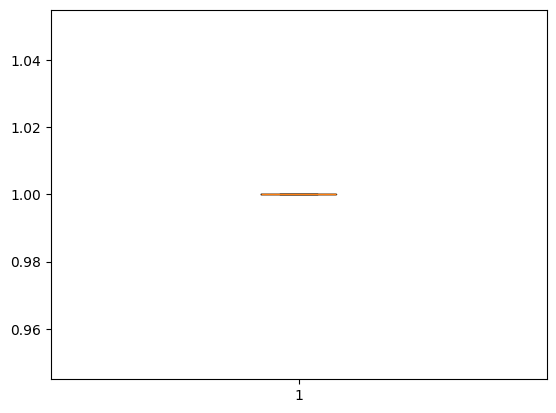

In [47]:
plt.boxplot(data_encoded['Fuel_Type_Petrol'])

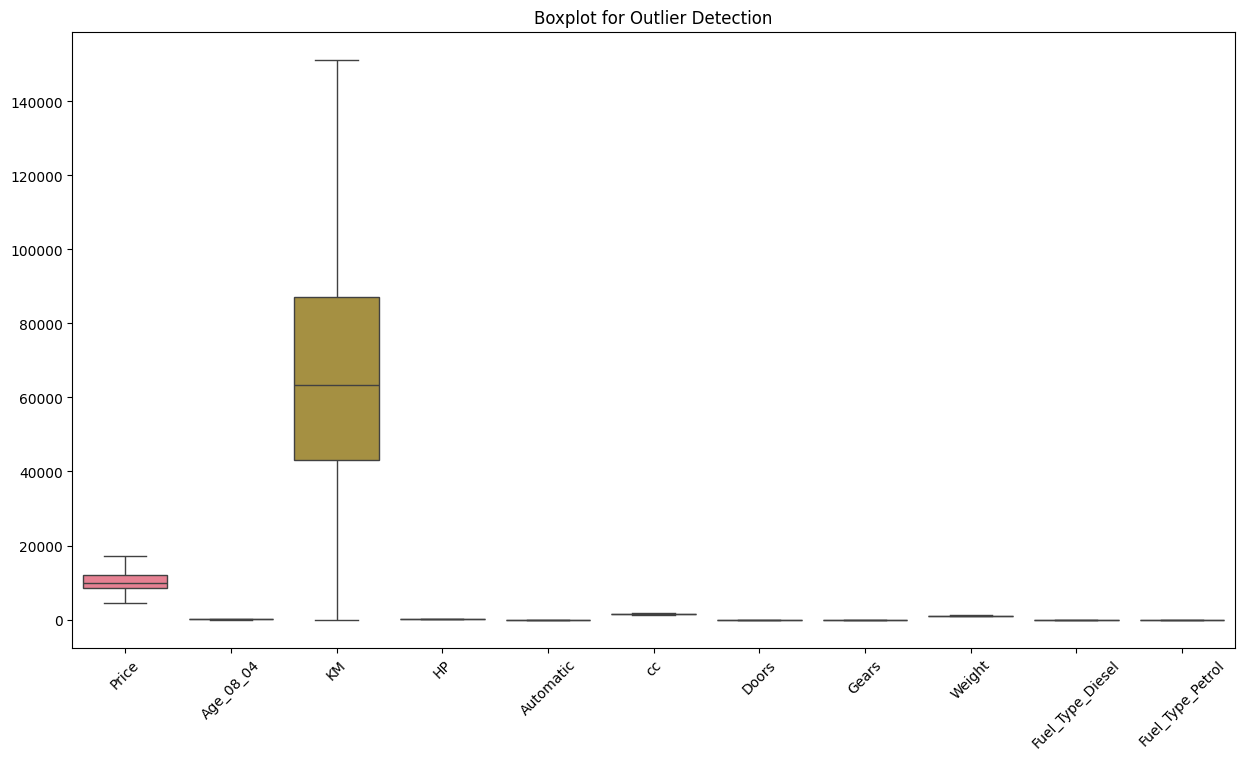

In [48]:
plt.figure(figsize=(15, 8))
sns.boxplot(data_encoded)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

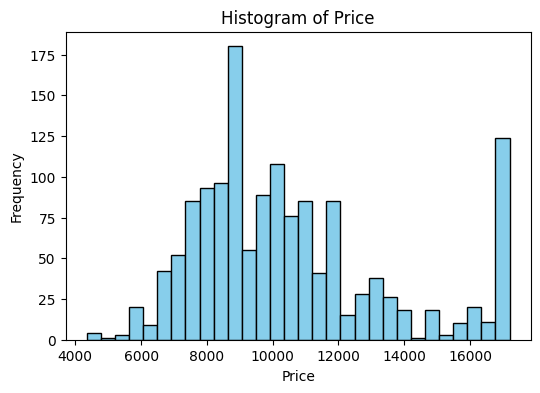

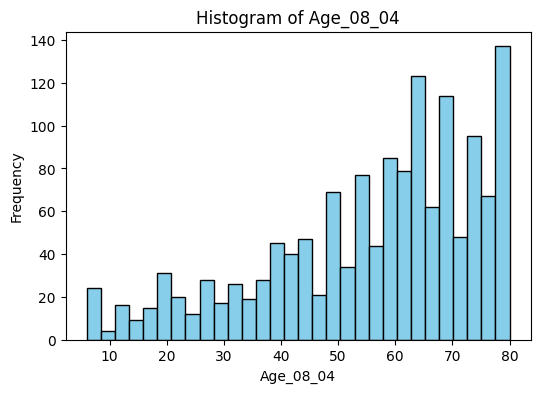

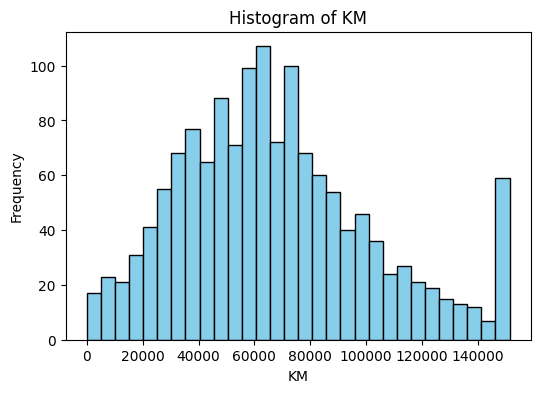

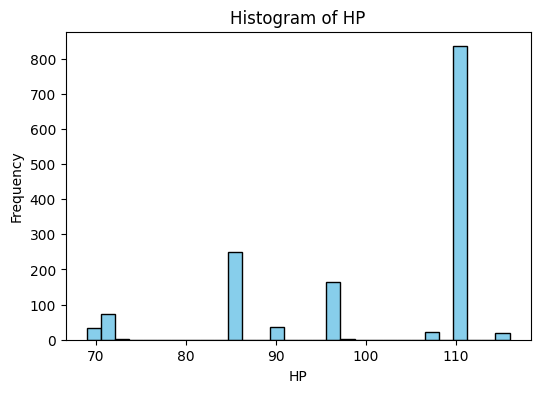

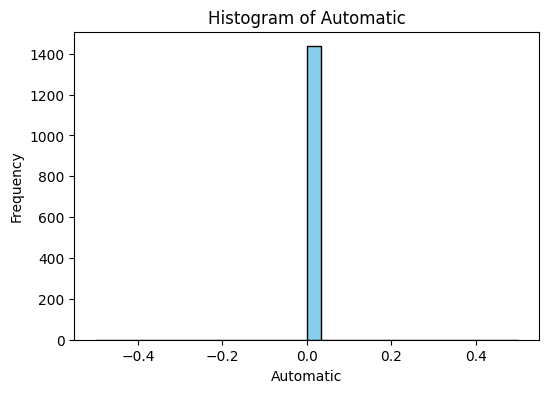

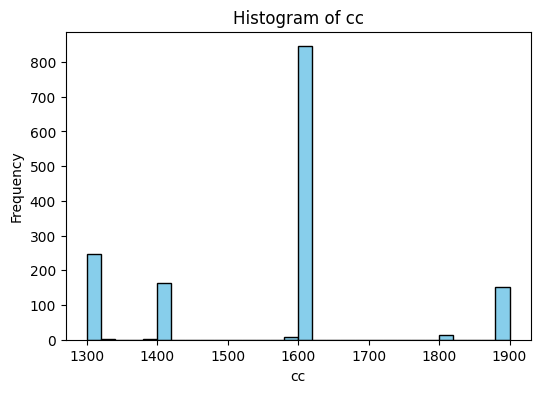

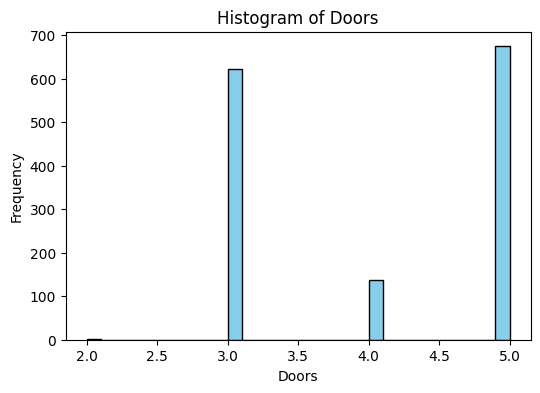

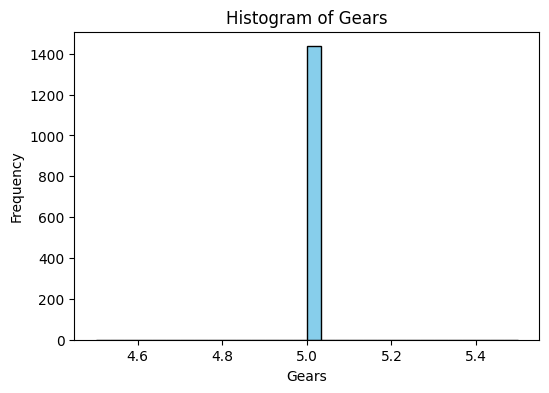

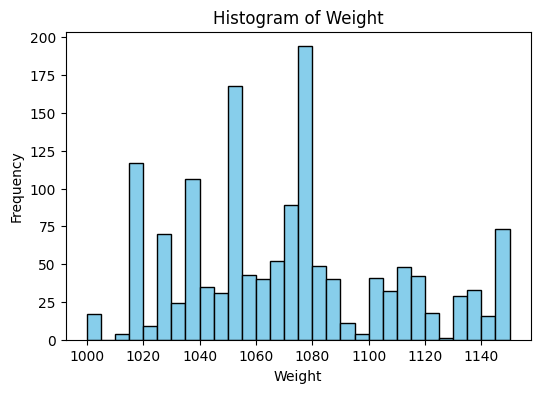

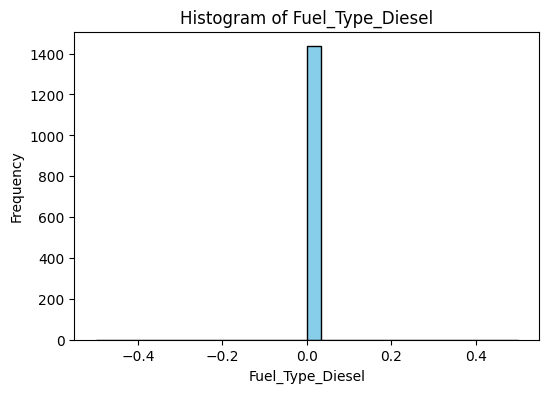

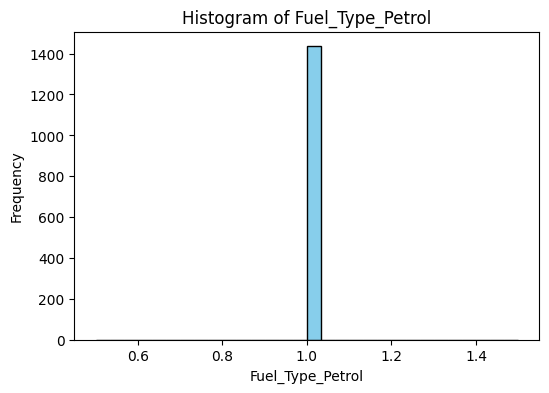

In [49]:
# Identify numerical columns
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Ploting histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data_encoded[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

# Scatterplot between variables along with histograms


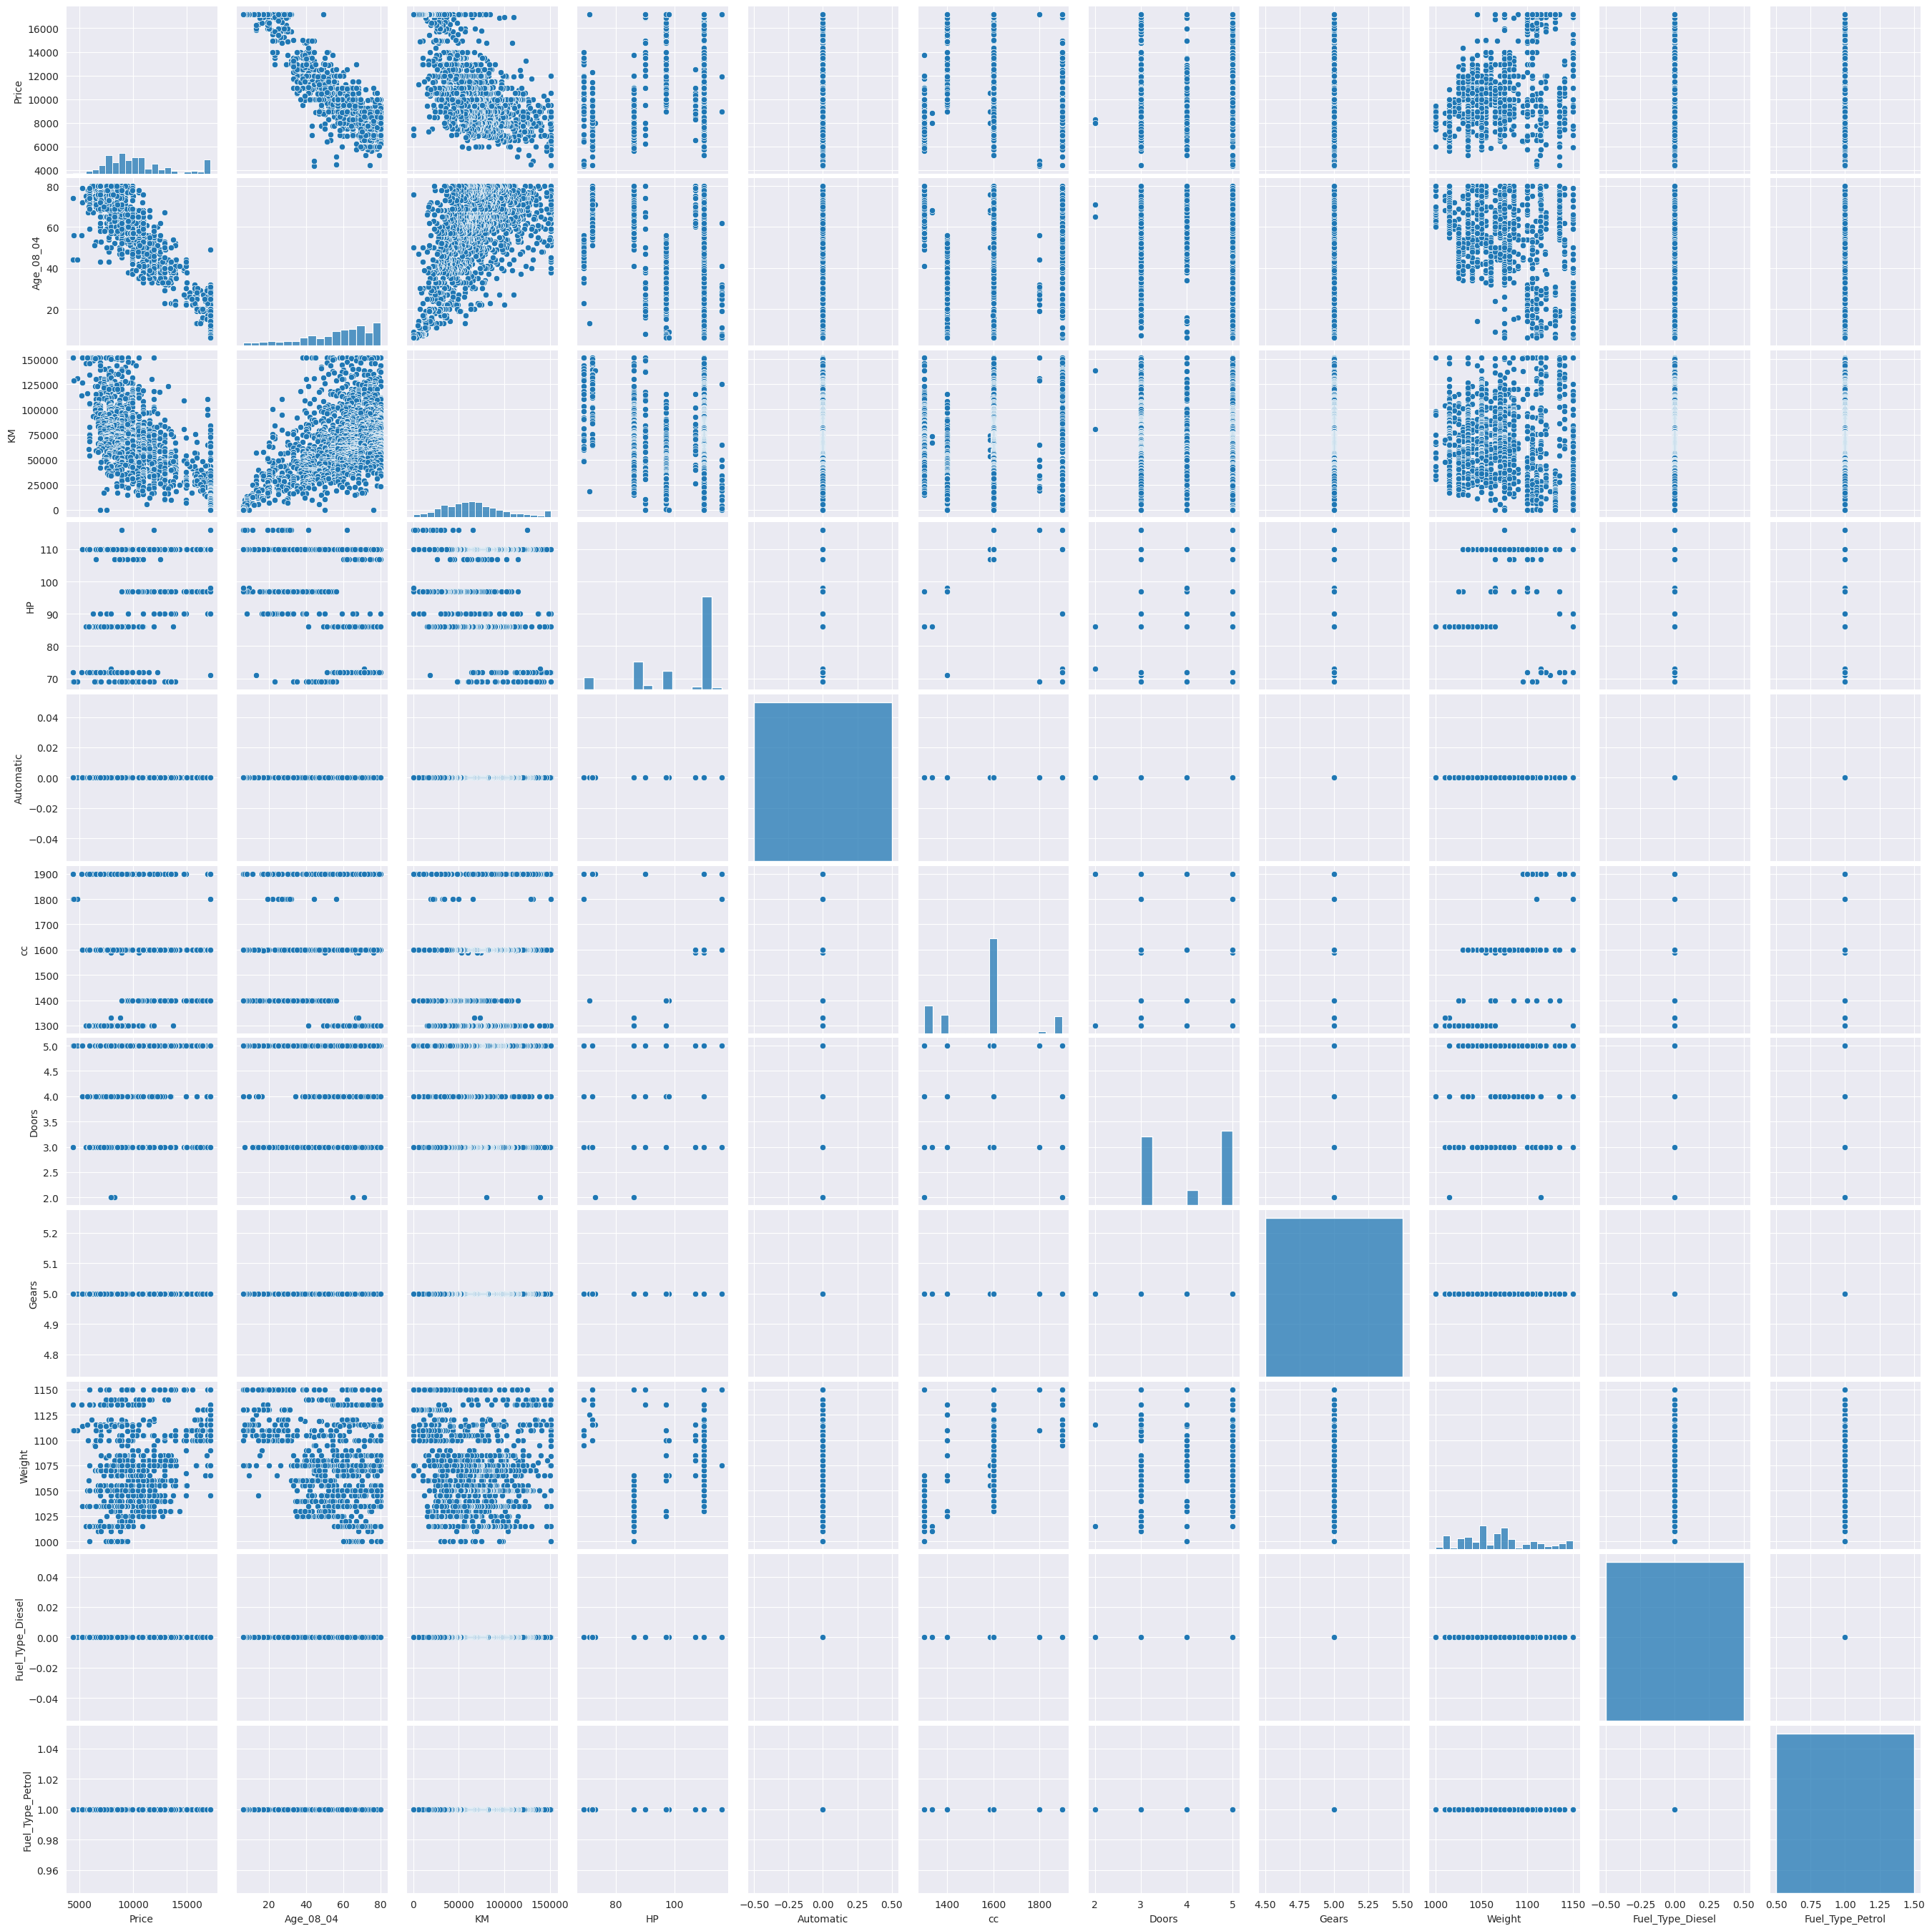

In [50]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data_encoded)

# prepare model

In [51]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Gears + Weight + Fuel_Type_Diesel + Fuel_Type_Petrol',
                data_encoded).fit()

In [52]:
#Coefficients
model.params

,0
Intercept,-2.375001e+02
Age_08_04,-1.069085e+02
KM,-1.597231e-02
HP,2.624699e+01
Automatic,9.414509e-12
cc,-2.351195e+00
Doors,-1.013339e+02
Gears,-1.187500e+03
Weight,2.377184e+01
Fuel_Type_Diesel,0.000000e+00


In [53]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           -4.610260
Age_08_04          -46.672287
KM                 -13.653623
HP                  10.197368
Automatic            4.625218
cc                  -8.065531
Doors               -2.895563
Gears               -4.610260
Weight              15.737661
Fuel_Type_Diesel          NaN
Fuel_Type_Petrol    -4.610260
dtype: float64 
 Intercept            4.380691e-06
Age_08_04           1.251058e-289
KM                   5.511135e-40
HP                   1.282281e-23
Automatic            4.080453e-06
cc                   1.529429e-15
Doors                3.842338e-03
Gears                4.380691e-06
Weight               1.380022e-51
Fuel_Type_Diesel              NaN
Fuel_Type_Petrol     4.380691e-06
dtype: float64


In [54]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8630752317960813, 0.8625003202430906)

In [55]:
smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Weight', data_encoded).fit().rsquared

0.8630752317960813

In [56]:
rsq_hp = smf.ols('HP ~ Age_08_04 + KM + cc + Doors + Weight', data_encoded).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

rsq_age = smf.ols('Age_08_04 ~ HP + KM + cc + Doors + Weight', data_encoded).fit().rsquared
vif_age = 1 / (1 - rsq_age)

rsq_km = smf.ols('KM ~ HP + Age_08_04 + cc + Doors + Weight', data_encoded).fit().rsquared
vif_km = 1 / (1 - rsq_km)

rsq_cc = smf.ols('cc ~ HP + Age_08_04 + KM + Doors + Weight', data_encoded).fit().rsquared
vif_cc = 1 / (1 - rsq_cc)

rsq_doors = smf.ols('Doors ~ HP + Age_08_04 + KM + cc + Weight', data_encoded).fit().rsquared
vif_doors = 1 / (1 - rsq_doors)

rsq_weight = smf.ols('Weight ~ HP + Age_08_04 + KM + cc + Doors', data_encoded).fit().rsquared
vif_weight = 1 / (1 - rsq_weight)

# Storing VIF values in a DataFrame
vif_data = {
    'Variables': ['HP', 'Age_08_04', 'KM', 'cc', 'Doors', 'Weight'],
    'VIF': [vif_hp, vif_age, vif_km, vif_cc, vif_doors, vif_weight]
}

Vif_frame = pd.DataFrame(vif_data)
print(Vif_frame)

   Variables       VIF
0         HP  1.266953
1  Age_08_04  2.120000
2         KM  1.922186
3         cc  2.847875
4      Doors  1.304740
5     Weight  3.770556


# residual analysis

**Test for Normality of Residuals (Q-Q Plot)**

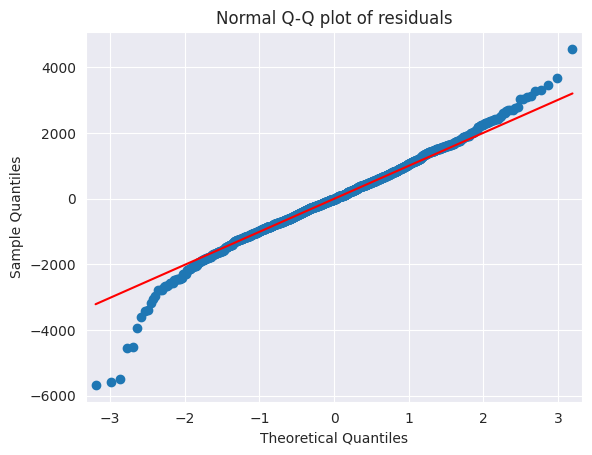

In [57]:
import statsmodels.api as sm         # quantile quantile graph
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [58]:
list(np.where(model.resid > 4000)[0])

[523]

# Residual Plot for Homoscedasticity

In [59]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

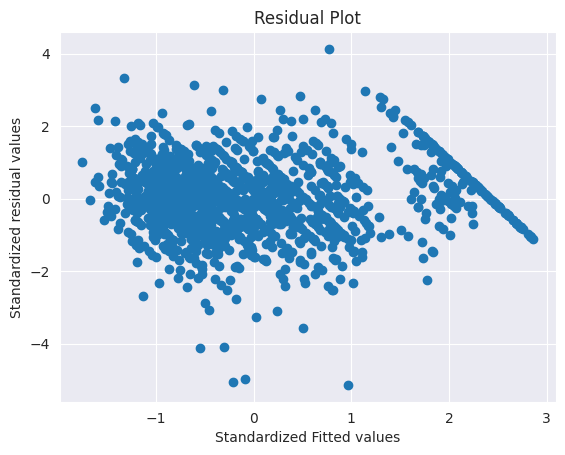

In [60]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

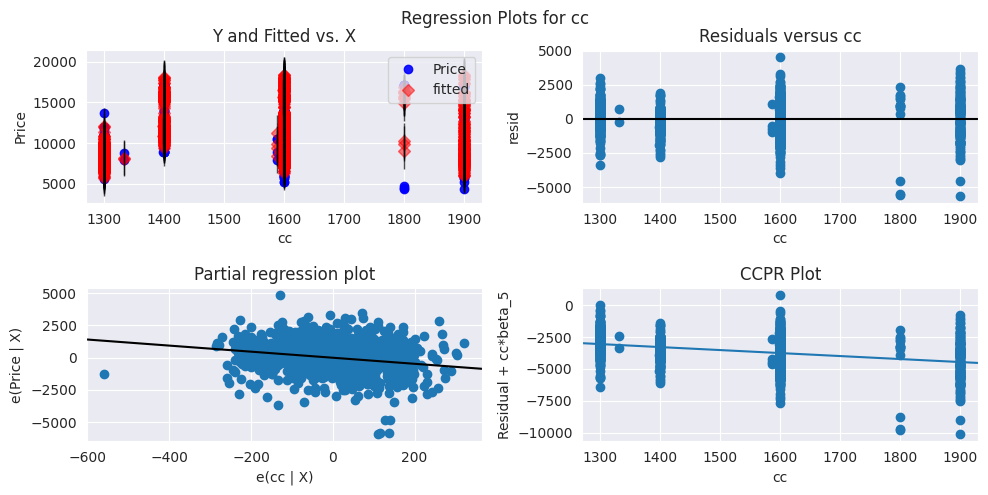

In [61]:
fig = plt.figure(figsize=(10, 5))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

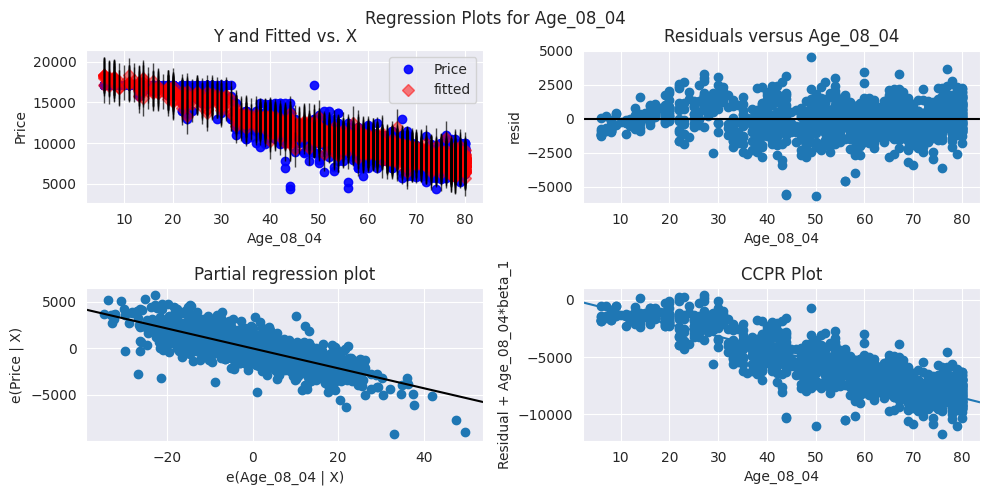

In [62]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

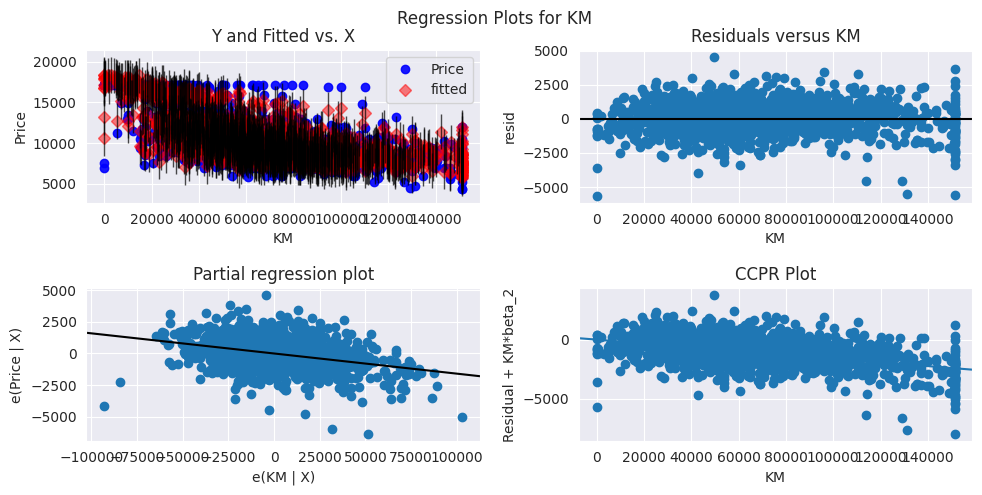

In [63]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

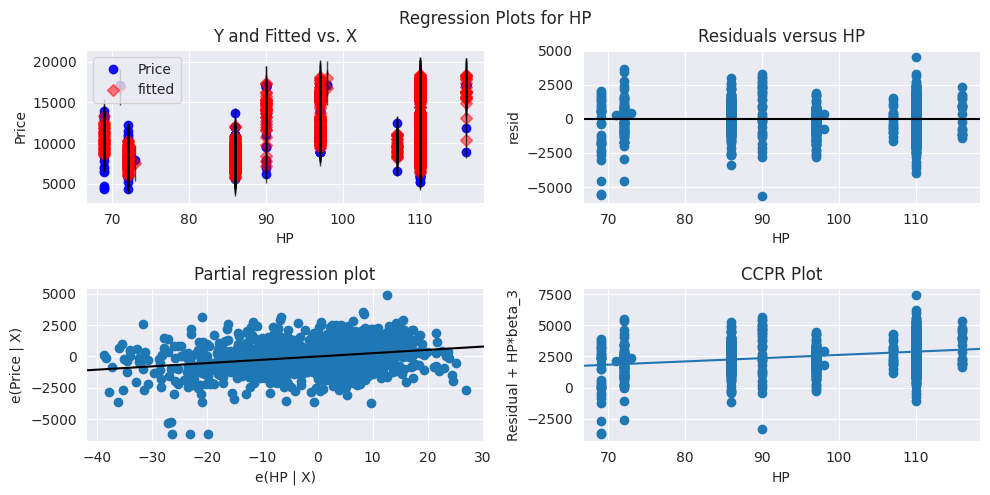

In [64]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

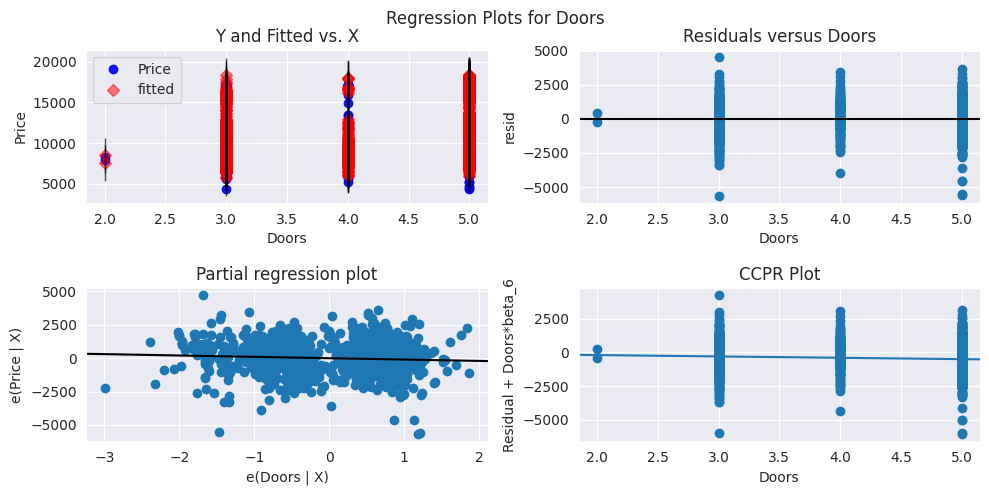

In [65]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

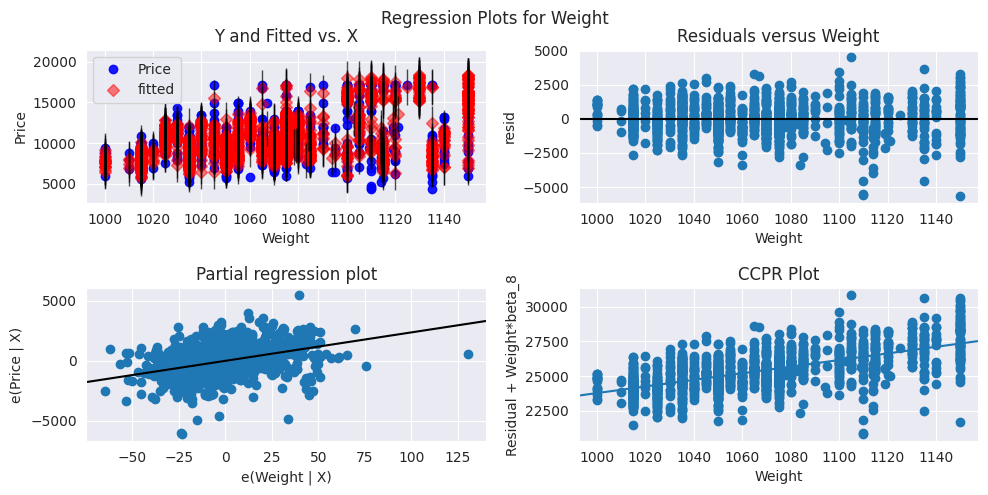

In [66]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

**Cook’s Distance**

In [67]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

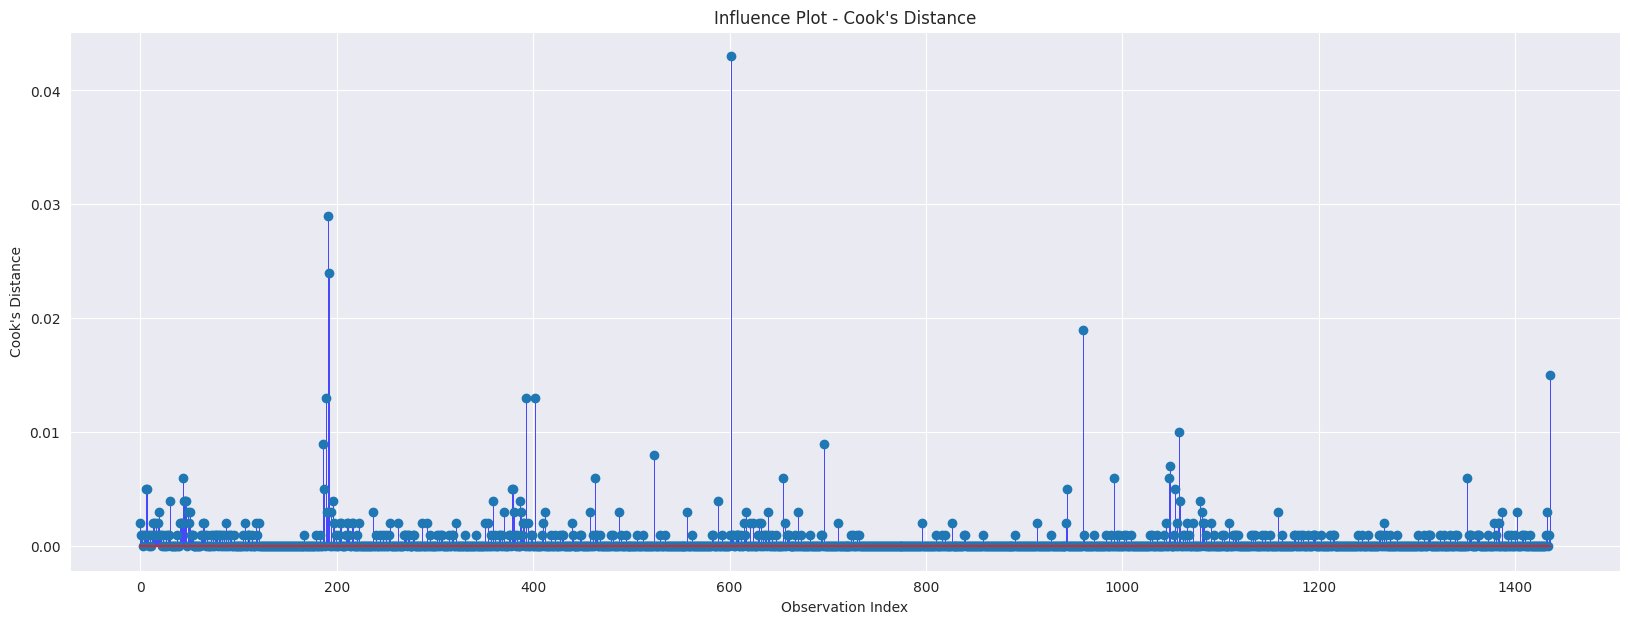

In [68]:
fig, ax = plt.subplots(figsize=(20, 7))

markerline, stemlines, baseline = ax.stem(np.arange(len(c)), np.round(c, 3))
plt.setp(stemlines, color='blue', linewidth=0.5)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Influence Plot - Cook's Distance")
plt.show()


In [69]:
#index and value of influencer where c is more than .4
(np.argmax(c),np.max(c))

(601, 0.04296658228974747)

# high influence points

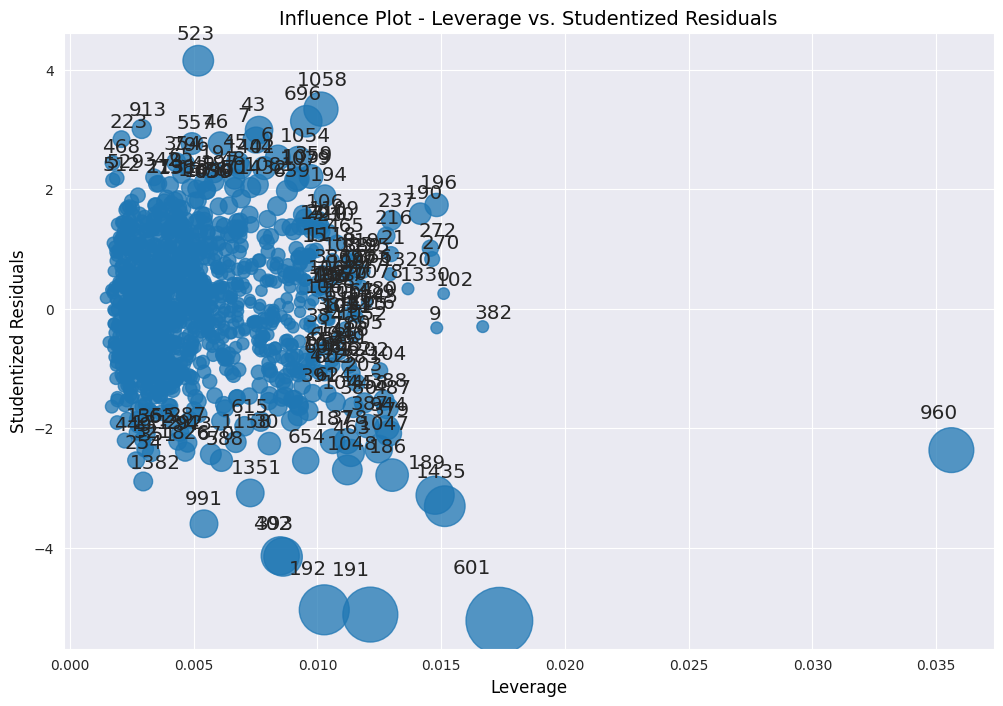

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))

# Influence plot with Cook’s Distance
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

# Improve labels and title
plt.title("Influence Plot - Leverage vs. Studentized Residuals", fontsize=14)
plt.xlabel("Leverage", fontsize=12)
plt.ylabel("Studentized Residuals", fontsize=12)

plt.show()

In [71]:
k = data_encoded.shape[1]
n = data_encoded.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.02506963788300836


In [72]:
influence = model.get_influence()
(c, p) = influence.cooks_distance  # Cook’s Distance values

# Set a threshold (commonly 4/n or 3 times mean)
threshold = 4 / len(c)
high_influence_points = np.where(c > threshold)[0]

print("High Influence Points (Cook's Distance):", high_influence_points)

High Influence Points (Cook's Distance): [   6    7   30   43   44   45   46   48  186  187  189  190  191  192
  194  196  359  378  379  380  387  393  402  463  487  523  557  588
  601  639  654  670  696  944  960  991 1047 1048 1054 1058 1059 1079
 1081 1158 1351 1387 1402 1435]


In [73]:
data_encoded[data_encoded.index.isin([960,601])]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
601,7500,50,1,90,0,1900,3,5,1150,0,1
960,9390,66,50806,86,0,1300,3,5,1150,0,1


In [74]:
#See the differences in price and other variable values
data_encoded.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,1900,3,5,1150,0,1
1,13750,23,72937,90,0,1900,3,5,1150,0,1
2,13950,24,41711,90,0,1900,3,5,1150,0,1
3,14950,26,48000,90,0,1900,3,5,1150,0,1
4,13750,30,38500,90,0,1900,3,5,1150,0,1


# improving the model

In [75]:
#load data
toyota_new = pd.read_csv("ToyotaCorolla - MLR.csv")

In [76]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2 = toyota_new.drop(toyota_new.index[[960,601]],axis=0).reset_index()
data2

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1430,1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1431,1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1432,1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [77]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

In [78]:
data2

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1430,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1431,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1432,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#build model

In [79]:
#Exclude variable "age" and generate R-Squared and AIC values
final_model = smf.ols('Price ~ Age_08_04 + KM + HP + Weight', data=data2).fit()

In [80]:
(final_model.rsquared,final_model.aic)

(0.8690554242411078, 24670.851652455043)

In [81]:
final_model_W = smf.ols('Price ~ Weight + Age_08_04 + KM + HP', data=data2).fit()

In [82]:
(final_model_W.rsquared,final_model_W.aic)

(0.8690554242411078, 24670.851652455043)

#Cook’s Distance

In [83]:
model_influence_V = final_model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

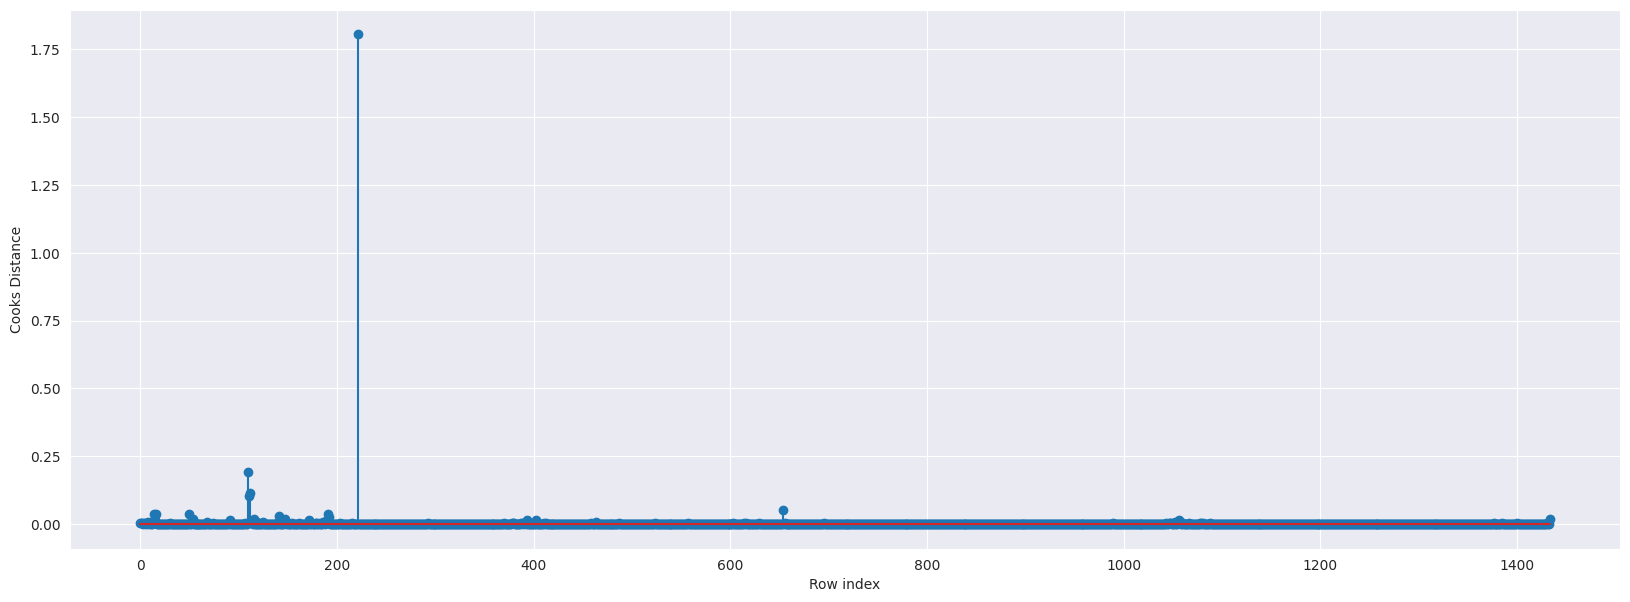

In [84]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [85]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(221, 1.8045369017861486)

In [86]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.025104602510460247


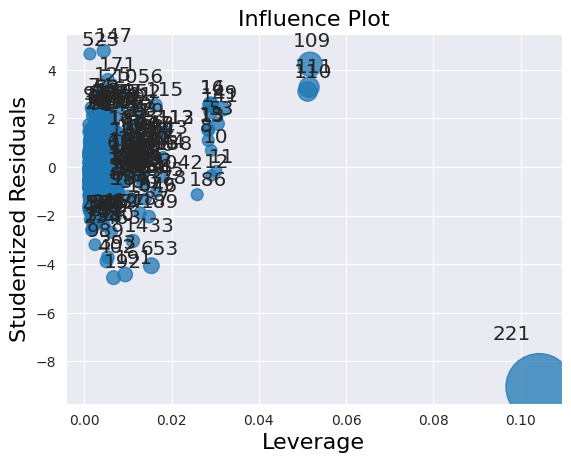

In [87]:
influence_plot(final_model)
plt.show()

In [88]:
#Drop 76 and 77 observations
data3 =data2.drop(data2.index[[221]],axis=0)

In [89]:
data3

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1430,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1431,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1432,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [90]:
#Reset the index and re arrange the row values
data4=data3.reset_index()

In [91]:
data4

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1429,1430,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1430,1431,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1431,1432,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [92]:
#Build the model on the new data
final_model = smf.ols('Price ~ Age_08_04 + KM + HP + Weight', data=data4).fit()

In [93]:
#Again check for influencers
model_influence_V = final_model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

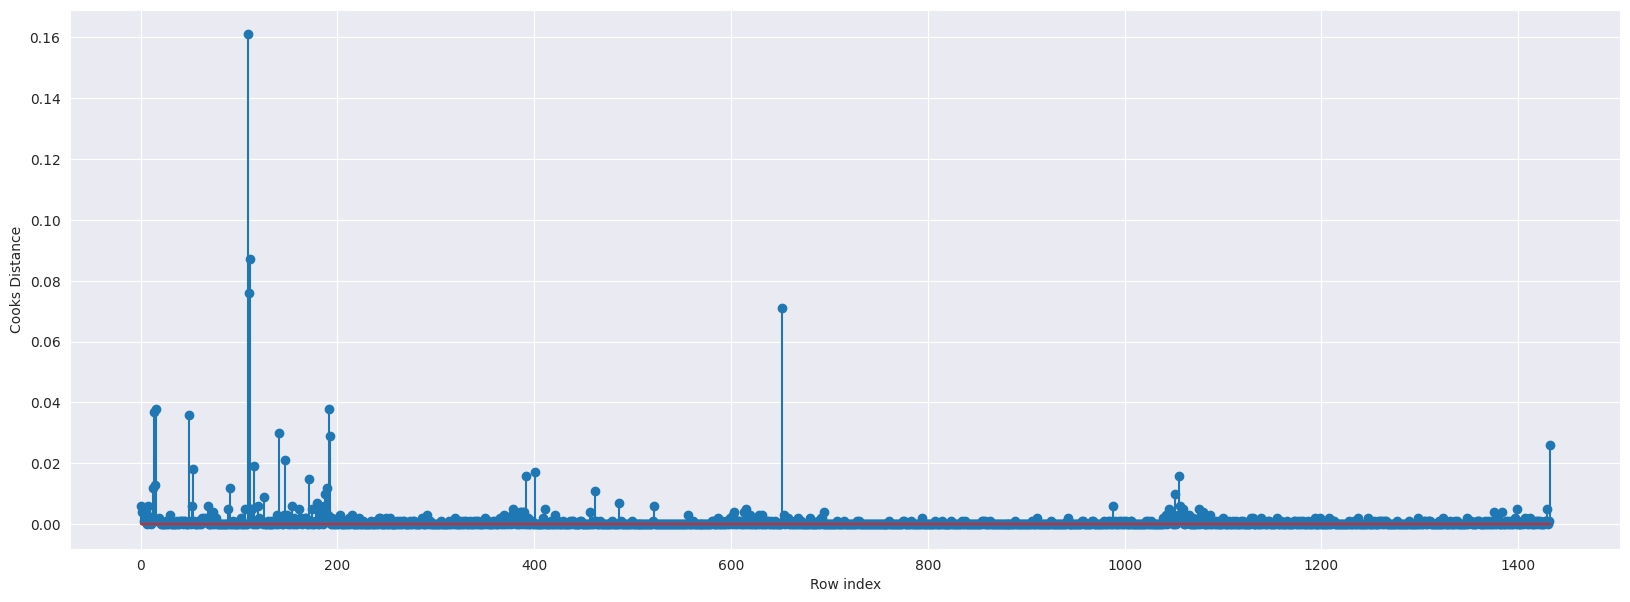

In [94]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [95]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(109, 0.16131318626848518)

**Since the value is <1 , we can stop the diagnostic process and finalize the model**

In [96]:
#Check the accuracy of the mode
final_model= smf.ols('Price ~ Age_08_04 + KM + HP + Weight',data = data4).fit()

In [97]:
(final_model.rsquared,final_model.aic)

(0.8761384492633815, 24574.741461854668)

#Predicting for new data

In [98]:
#New data for prediction
new_data = pd.DataFrame({'Price': [1.2], 'Age_08_04': [5], 'KM': [50000], 'HP': [90], 'Weight': [1050]}, index=[1])

In [99]:
new_data

,Price,Age_08_04,KM,HP,Weight
1,1.2,5,50000,90,1050


In [100]:
final_model.predict(new_data)

,0
1,16162.615869


In [101]:
final_model.predict(toyota_new.iloc[0:5,])

,0
0,16806.449567
1,16231.861594
2,16808.717363
3,16440.416190
4,16307.370121


In [102]:
pred_y = final_model.predict(toyota_new)

In [103]:
pred_y

,0
0,16806.449567
1,16231.861594
2,16808.717363
3,16440.416190
4,16307.370121
...,...
1431,8800.237738
1432,8261.398873
1433,8419.854521
1434,8536.596025


In [104]:
toyota_new.Price

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


# feature scalling

In [105]:
data4 = pd.get_dummies(data4, columns=['Fuel_Type'], drop_first=True, dtype=int)

In [106]:
features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
target = 'Price'  # Target variable

In [107]:
# Separating independent features and target variable
X = data4[features]  # Independent variables
y = data4[target]  # Target variable (Price)

In [108]:
# Checking basic statistics before scaling
print("Before Scaling:")
print(X.describe())

Before Scaling:
         Age_08_04             KM           HP    Automatic            cc  \
count  1433.000000    1433.000000  1433.000000  1433.000000   1433.000000   
mean     55.952547   68589.519888   101.515003     0.055827   1576.737613   
std      18.614225   37498.748695    14.986398     0.229667    424.620412   
min       1.000000       1.000000    69.000000     0.000000   1300.000000   
25%      44.000000   43000.000000    90.000000     0.000000   1400.000000   
50%      61.000000   63451.000000   110.000000     0.000000   1600.000000   
75%      70.000000   87083.000000   110.000000     0.000000   1600.000000   
max      80.000000  243000.000000   192.000000     1.000000  16000.000000   

             Doors        Gears       Weight  Fuel_Type_Diesel  \
count  1433.000000  1433.000000  1433.000000       1433.000000   
mean      4.034194     5.026518  1071.665736          0.107467   
std       0.952549     0.188704    49.296708          0.309814   
min       2.000000     3.0

In [109]:
# Applying Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [110]:
# Converting scaled data back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [111]:
# Checking basic statistics after scaling
print("\nAfter Scaling:")
print(X_scaled.describe())


After Scaling:
          Age_08_04            KM            HP     Automatic            cc  \
count  1.433000e+03  1.433000e+03  1.433000e+03  1.433000e+03  1.433000e+03   
mean  -1.586697e-16  1.983371e-17  2.479214e-16 -7.933485e-17  2.280877e-16   
std    1.000349e+00  1.000349e+00  1.000349e+00  1.000349e+00  1.000349e+00   
min   -2.953211e+00 -1.829727e+00 -2.170392e+00 -2.431622e-01 -6.519569e-01   
25%   -6.423431e-01 -6.826482e-01 -7.686319e-01 -2.431622e-01 -4.163703e-01   
50%    2.712557e-01 -1.370796e-01  5.663775e-01 -2.431622e-01  5.480308e-02   
75%    7.549257e-01  4.933481e-01  5.663775e-01 -2.431622e-01  5.480308e-02   
max    1.292337e+00  4.652725e+00  6.039916e+00  4.112481e+00  3.397928e+01   

              Doors         Gears        Weight  Fuel_Type_Diesel  \
count  1.433000e+03  1.433000e+03  1.433000e+03      1.433000e+03   
mean   9.916856e-17 -1.635042e-15  1.090854e-15      6.941799e-17   
std    1.000349e+00  1.000349e+00  1.000349e+00      1.000349e+00

In [112]:
X_scaled.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.770906,-0.576314,-0.768632,-0.243162,0.99715,-1.086091,-0.140575,1.893977,2.881873,-2.716637
1,-1.770906,0.115977,-0.768632,-0.243162,0.99715,-1.086091,-0.140575,1.893977,2.881873,-2.716637
2,-1.717165,-0.717035,-0.768632,-0.243162,0.99715,-1.086091,-0.140575,1.893977,2.881873,-2.716637
3,-1.609683,-0.549264,-0.768632,-0.243162,0.99715,-1.086091,-0.140575,1.893977,2.881873,-2.716637
4,-1.394719,-0.802694,-0.768632,-0.243162,0.99715,-1.086091,-0.140575,1.995439,2.881873,-2.716637


#overfitting

In [113]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [114]:
# Predictions
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [115]:
# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [116]:

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train R² Score: -9.3082
Test R² Score: -8.9637
Train MSE: 135921667.4766
Test MSE: 130055829.0349


In [117]:
# Check Overfitting
if train_r2 > test_r2 + 0.1:  # 0.1 threshold can be adjusted
    print("⚠️ Overfitting detected! Your model is performing much better on training data than test data.")
else:
    print("✅ No overfitting detected. The model is generalizing well.")

✅ No overfitting detected. The model is generalizing well.


#Lasso Model

In [118]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [119]:
# Applying Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [120]:
# Predictions
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

In [121]:
# Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [122]:

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [123]:
# Displaying Results
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

# Overfitting Check
if train_r2 > test_r2 + 0.1:
    print(" Ridge Model is Overfitting! It performs much better on training data than test data.")
else:
    print(" Ridge Model is Generalizing Well.")

Train R² Score: 0.8877
Test R² Score: 0.8862
Train MSE: 1480492.3370
Test MSE: 1485584.5378
 Ridge Model is Generalizing Well.


# Ridge model

In [124]:
from sklearn.linear_model import Ridge

In [125]:
# Applying Ridge Regression with cross-validation to find the best alpha
alphas = [0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

In [126]:
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)


In [127]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)



In [128]:
print(f"Alpha: {alpha}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}\n")

Alpha: 100
Train R² Score: 0.8828
Test R² Score: 0.8812
Train MSE: 1545793.0363
Test MSE: 1550562.3777



# Normalization:
 **It is used to scale and standardize the features of data set. Primary goal is to bring all the feature values to a similar sclae , typically between 0 and 1 also the reason for this is computer only understand a specific language which in the form of 0 and 1.**

**It is helpful is various ways :-**
1. **Organise data into separate table.**
2. **Remove duplicate data from the list**
3. **A nomalised database is esay to update, fix error and add new data**

 # Standardization:
 **z-score normalization is callled as standardization. Additionally , we can say the value are centered around the mean
  with an unit standard deviation.**
**it is helpful because:-**
1. **It improves model performance.**
2. **Standardized data reduces the impact of outliers and makes the model less sensitive.**


# Multicollinearity:
**Means when there is high correlation between 2 independent varibles.**

**Techniques to address the Multicollinearity are:-**
1. **By VIF (variance inflation factor).**
2. **By PCA (Principal Component Analysis).**
3. **Ridge Regression.**